In [2]:
# The focus of this analysis is to study how nations reacted to COVID in it's early stages (2020 - 2021) before the vaccine became as prominent and effective as it is now
# This allows us to analyze how countries reacted and we can use that information to prepare for future outbreaks. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import euclidean

In [103]:
# imported the SQL dataset; make sure the columns that we need were imported
dataset = pd.read_csv('../Downloads/PublicPolicydataset.csv')
dataset.columns

Index(['location', 'population', 'year_week', 'weekly_new_deaths_per_million',
       'weekly_average_rr', 'weekly_avg_stringency_index',
       'lagged_stringency_2weeks', 'weekly_avg_positive_rate',
       'population_density', 'median_age', 'gdp_per_capita'],
      dtype='object')

In [4]:
# making sure there are minimal null values
print(dataset.isnull().sum() * 100 / len(dataset))

location                         0.000000
population                       0.000000
year_week                        0.000000
weekly_new_deaths_per_million    0.000000
weekly_average_rr                0.000000
weekly_avg_stringency_index      0.000000
lagged_stringency_2weeks         4.055535
weekly_avg_positive_rate         0.000000
population_density               1.644136
median_age                       0.292291
gdp_per_capita                   2.374863
dtype: float64


In [5]:
# Now we want to generate a statistical summary of the dataset
dataset.describe()

,population,year_week,weekly_new_deaths_per_million,weekly_average_rr,weekly_avg_stringency_index,lagged_stringency_2weeks,weekly_avg_positive_rate,population_density,median_age,gdp_per_capita
count,5.474000e+03,5474.000000,5474.000000,5474.000000,5474.000000,5252.000000,5474.000000,5384.000000,5458.000000,5344.000000
mean,5.189020e+07,202056.150530,12.424855,1.067349,62.053136,62.115033,0.091488,252.045268,33.551411,24783.063130
std,1.492132e+08,35.235617,22.701838,0.284208,17.552080,17.609568,0.097301,821.428520,9.004450,21772.676694
min,7.726500e+04,202009.000000,-34.755000,-0.001429,4.365714,4.365714,0.000000,1.980000,16.400000,808.133000
25%,5.421242e+06,202029.000000,0.400000,0.905714,50.000000,50.000000,0.018179,43.951000,27.500000,7485.013000
50%,1.295221e+07,202043.000000,2.786500,1.045714,63.292143,63.327143,0.057143,96.254000,34.000000,20551.409000
75%,4.519578e+07,202103.000000,13.911750,1.199643,75.460000,75.460000,0.131857,207.566000,41.800000,35938.374000
max,1.380004e+09,202117.000000,197.417000,3.524286,100.000000,100.000000,0.615143,7915.731000,48.200000,116935.600000


In [6]:
# Having a negative new weekly deaths per million is strange. Likely attributed to either data reporting error
# deaths that were initially flagged due to COVID got updated.
dataset.loc[dataset['weekly_new_deaths_per_million'] < 0]

,location,population,year_week,weekly_new_deaths_per_million,weekly_average_rr,weekly_avg_stringency_index,lagged_stringency_2weeks,weekly_avg_positive_rate,population_density,median_age,gdp_per_capita
720,Spain,46754783,202022,-34.755,0.835714,69.645714,82.338571,0.012857,93.105,45.5,34272.360
800,Australia,25499881,202023,-0.039,0.877143,62.040000,67.130000,0.000143,3.202,37.9,44648.710
1386,Finland,5540718,202029,-0.180,1.184286,38.361429,35.190000,0.001000,18.136,42.8,40585.721
1527,Estonia,1326539,202031,-4.523,1.815714,32.807143,35.190000,0.007714,31.033,42.7,29481.252
1564,Ireland,4937796,202031,-0.203,1.587143,38.890000,38.890000,0.004857,69.874,38.7,67335.293
1920,Belgium,11589616,202035,-8.456,0.957143,55.158571,59.652857,0.027714,375.564,41.8,42658.576
2529,Sweden,10099270,202041,-0.099,1.450000,55.560000,55.560000,0.028714,24.718,41.0,46949.283
2734,Switzerland,8654618,202043,-4.622,1.942857,35.252857,31.148571,0.197571,214.243,43.1,57410.166


In [7]:
# First we're going to look at the general correlations; starting with various variables and the weekly new deaths per million
death_stringency_corr = dataset['weekly_new_deaths_per_million'].corr(dataset['weekly_avg_stringency_index'])
death_lagged_stringency_corr = dataset['weekly_new_deaths_per_million'].corr(dataset['lagged_stringency_2weeks'])
death_age_corr = dataset['weekly_new_deaths_per_million'].corr(dataset['median_age'])
death_popdensity_corr = dataset['weekly_new_deaths_per_million'].corr(dataset['population_density'])
death_gdp_corr = dataset['weekly_new_deaths_per_million'].corr(dataset['gdp_per_capita'])

print(f'Average Weekly New Deaths - Stringency correlation: {death_stringency_corr}')
print(f'Average Weekly New Deaths - Lagged Stringency correlation: {death_lagged_stringency_corr}')
print(f'Average Weekly New Deaths - Age correlation: {death_age_corr}')
print(f'Average Weekly New Deaths - Population Density correlation: {death_popdensity_corr}')
print(f'Average Weekly New Deaths - GDP per Capita correlation: {death_gdp_corr}')

Average Weekly New Deaths - Stringency correlation: 0.1866206497903894
Average Weekly New Deaths - Lagged Stringency correlation: 0.15370636359709403
Average Weekly New Deaths - Age correlation: 0.29214785185373104
Average Weekly New Deaths - Population Density correlation: -0.07334893752676051
Average Weekly New Deaths - GDP per Capita correlation: 0.08324252009514835


In [8]:
# Now, we're going to be looking at how these variables correlate with the weekly average COVID reproduction rate
rr_stringency_corr = dataset['weekly_average_rr'].corr(dataset['weekly_avg_stringency_index'])
rr_lagged_stringency_corr = dataset['weekly_average_rr'].corr(dataset['lagged_stringency_2weeks'])
rr_age_corr = dataset['weekly_average_rr'].corr(dataset['median_age'])
rr_popdensity_corr = dataset['weekly_average_rr'].corr(dataset['population_density'])
rr_gdp_corr = dataset['weekly_average_rr'].corr(dataset['gdp_per_capita'])

print(f'Reproduction Rate - Stringency correlation: {rr_stringency_corr}')
print(f'Reproduction Rate - Lagged Stringency correlation: {rr_lagged_stringency_corr}')
print(f'Reproduction Rate - Age correlation: {rr_age_corr}')
print(f'Reproduction Rate - Population Density correlation: {rr_popdensity_corr}')
print(f'Reproduction Rate - GDP per Capita correlation: {rr_gdp_corr}')

Reproduction Rate - Stringency correlation: 0.008180185718618676
Reproduction Rate - Lagged Stringency correlation: -0.09100763982963532
Reproduction Rate - Age correlation: 0.02510975399969071
Reproduction Rate - Population Density correlation: -0.0325276257154086
Reproduction Rate - GDP per Capita correlation: 0.0010821867641329613


In [9]:
#Now we'll look at how these variables correlate with the weekly average positive rate
pr_stringency_corr = dataset['weekly_avg_positive_rate'].corr(dataset['weekly_avg_stringency_index'])
pr_lagged_stringency_corr = dataset['weekly_avg_positive_rate'].corr(dataset['lagged_stringency_2weeks'])
pr_age_corr = dataset['weekly_avg_positive_rate'].corr(dataset['median_age'])
pr_popdensity_corr = dataset['weekly_avg_positive_rate'].corr(dataset['population_density'])
pr_gdp_corr = dataset['weekly_avg_positive_rate'].corr(dataset['gdp_per_capita'])

print(f'Positive Rate - Stringency correlation: {pr_stringency_corr}')
print(f'Positive Rate - Lagged Stringency correlation: {pr_lagged_stringency_corr}')
print(f'Positive Rate - Age correlation: {pr_age_corr}')
print(f'Positive Rate - Population Density correlation: {pr_popdensity_corr}')
print(f'Positive Rate - GDP per Capita correlation: {pr_gdp_corr}')

Positive Rate - Stringency correlation: 0.2470574885985417
Positive Rate - Lagged Stringency correlation: 0.20454470793614837
Positive Rate - Age correlation: -0.18699329674551005
Positive Rate - Population Density correlation: -0.10192689279985628
Positive Rate - GDP per Capita correlation: -0.24079298174564331


In [10]:
# Now we'll look to create a dataframe through a dictionary of the correlations
correlations = {
    'predictor' : 
    [
        'weekly_avg_stringency', 'Two_weeks_lagged_avg_stringency', 'median_age', 'population_density', 'gdp_per_capita',
        'weekly_avg_stringency', 'Two_weeks_lagged_avg_stringency', 'median_age', 'population_density', 'gdp_per_capita',
        'weekly_avg_stringency', 'Two_weeks_lagged_avg_stringency', 'median_age', 'population_density', 'gdp_per_capita',
    ],
    
    'outcome' : 
    [
    'weekly_new_deaths_per_million', 'weekly_new_deaths_per_million', 'weekly_new_deaths_per_million', 'weekly_new_deaths_per_million', 'weekly_new_deaths_per_million',
    'weekly_average_rr', 'weekly_average_rr', 'weekly_average_rr', 'weekly_average_rr', 'weekly_average_rr',
    'weekly_average_pr', 'weekly_average_pr', 'weekly_average_pr', 'weekly_average_pr', 'weekly_average_pr'
    ],

    'predictor-outcome' : 
    [
    'D-S', 'D-LS', 'D-A', 'D-PD', 'D-GDP',
    'RR-S', 'RR-LS', 'RR-A', 'RR-PD', 'RR-GDP',
    'PR-S', 'PR-LS', 'PR-A', 'PR-PD', 'PR-GDP'
    ],
    
    'correlation': 
    [
    death_stringency_corr, death_lagged_stringency_corr, death_age_corr, death_popdensity_corr, death_gdp_corr,
    rr_stringency_corr, rr_lagged_stringency_corr, rr_age_corr, rr_popdensity_corr, rr_gdp_corr,
    pr_stringency_corr, pr_lagged_stringency_corr, pr_age_corr, pr_popdensity_corr, pr_gdp_corr
    ]
}

correlation_df = pd.DataFrame.from_dict(correlations)
correlation_df

,predictor,outcome,predictor-outcome,correlation
0,weekly_avg_stringency,weekly_new_deaths_per_million,D-S,0.186621
1,Two_weeks_lagged_avg_stringency,weekly_new_deaths_per_million,D-LS,0.153706
2,median_age,weekly_new_deaths_per_million,D-A,0.292148
3,population_density,weekly_new_deaths_per_million,D-PD,-0.073349
4,gdp_per_capita,weekly_new_deaths_per_million,D-GDP,0.083243
5,weekly_avg_stringency,weekly_average_rr,RR-S,0.008180
6,Two_weeks_lagged_avg_stringency,weekly_average_rr,RR-LS,-0.091008
7,median_age,weekly_average_rr,RR-A,0.025110
8,population_density,weekly_average_rr,RR-PD,-0.032528
9,gdp_per_capita,weekly_average_rr,RR-GDP,0.001082


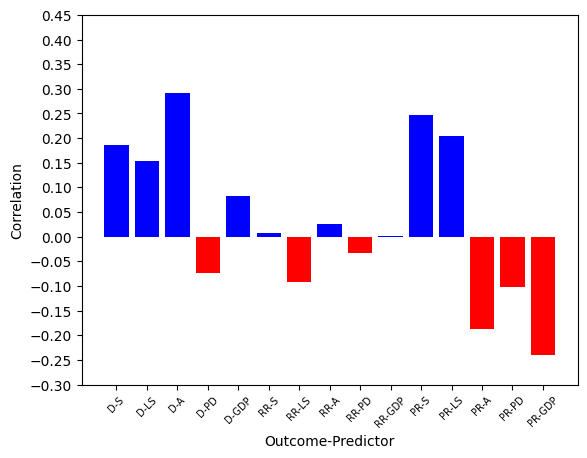

In [11]:
# Now we'll look to graph the correlations and then the absolute value correlations

# adjusting the color of the bar based on the sign
colors = ['red' if corr < 0 else 'blue' for corr in correlations['correlation']]

plt.bar(correlation_df['predictor-outcome'], correlation_df['correlation'], color = colors);
plt.xticks(rotation = 45, fontsize = 7);
plt.yticks(np.arange(-0.30, 0.5, 0.05));
plt.xlabel('Outcome-Predictor');
plt.ylabel('Correlation');

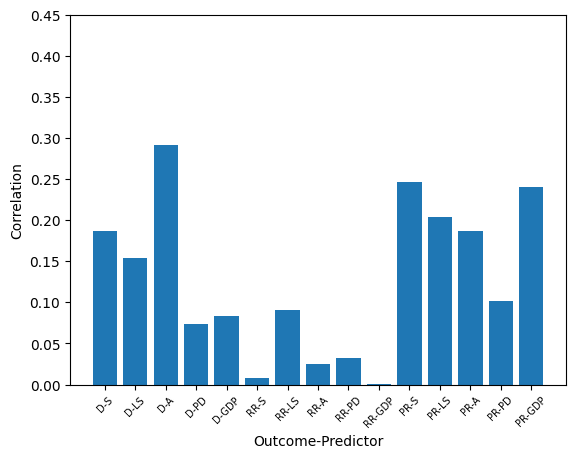

In [12]:
# Now we'll graph the absolute value correlation 

# First we'll get the absolute value correlations
absolute_correlation = [abs(c) for c in correlations['correlation']];

plt.bar(correlation_df['predictor-outcome'], absolute_correlation);
plt.xticks(rotation = 45, fontsize = 7);
plt.yticks(np.arange(0, 0.5, 0.05));
plt.xlabel('Outcome-Predictor');
plt.ylabel('Correlation');

In [13]:
# Here is a correlation matrix that shows the correlation between all of the variables
numeric_cols = ['weekly_new_deaths_per_million', 'weekly_average_rr', 'weekly_avg_stringency_index', 
                'lagged_stringency_2weeks', 'median_age', 'population_density', 'gdp_per_capita', ]

correlation_matrix = dataset[numeric_cols].corr()
print(correlation_matrix)

                               weekly_new_deaths_per_million  \
weekly_new_deaths_per_million                       1.000000   
weekly_average_rr                                  -0.103460   
weekly_avg_stringency_index                         0.186621   
lagged_stringency_2weeks                            0.153706   
median_age                                          0.292148   
population_density                                 -0.073349   
gdp_per_capita                                      0.083243   

                               weekly_average_rr  weekly_avg_stringency_index  \
weekly_new_deaths_per_million          -0.103460                     0.186621   
weekly_average_rr                       1.000000                     0.008180   
weekly_avg_stringency_index             0.008180                     1.000000   
lagged_stringency_2weeks               -0.091008                     0.920064   
median_age                              0.025110                    -0.094782   
p

In [14]:
# Based on the results shown it's evident that a general correlation analysis can't take us too far or there really isn't a powerful correlation present
# The highest correlation was between death and age which matches with warning that older people are more susceptible
# Now I'll focus on a general time-series analysis to get more results
# It's important to note that the first two weeks for lagged stringency index are guaranteed to be null since there wasn't a stringency two weeks prior
dataset.head()

,location,population,year_week,weekly_new_deaths_per_million,weekly_average_rr,weekly_avg_stringency_index,lagged_stringency_2weeks,weekly_avg_positive_rate,population_density,median_age,gdp_per_capita
0,Japan,126476458,202009,0.032,1.105714,32.937143,NaN,0.163429,347.778,48.2,39002.223
1,South Korea,51269183,202009,0.216,2.978571,55.560000,NaN,0.037714,527.967,43.4,35938.374
2,South Korea,51269183,202010,0.645,1.261429,55.560000,NaN,0.044714,527.967,43.4,35938.374
3,Japan,126476458,202010,0.016,1.522857,43.520000,NaN,0.063286,347.778,48.2,39002.223
4,Italy,60461828,202010,5.491,2.611429,73.217143,NaN,0.155571,205.859,47.9,35220.084


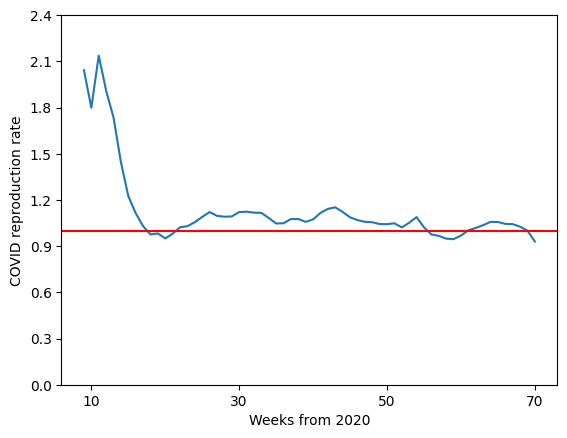

In [15]:
# For the sake of global time-series analysis, it doesn't make sense to factor in location or population
ta_dataset = dataset.drop(columns=['location', 'population'])
ta_dataset = ta_dataset.groupby(['year_week']).mean()

# converting year_weeks into just weeks for valid plotting
date_list = []
for value in ta_dataset.index:
    date = 0
    if value // 100 == 2021:
        date += 53
    date += value % 100
    date_list.append(date)


# This dataset shows the initial spike in reproduction that came in due to no precautions being made but it slowly levels out around 1
# The 1 is highlighted because > 1 means that it's increasing and < 1 means it's decreasing
plt.plot(date_list, ta_dataset['weekly_average_rr'])
plt.xticks([10, 30, 50, 70])
plt.yticks(np.arange(0, 2.51, 0.3))
plt.axhline(y=1, color = 'red')
plt.xlabel('Weeks from 2020')
plt.ylabel('COVID reproduction rate')
plt.show()


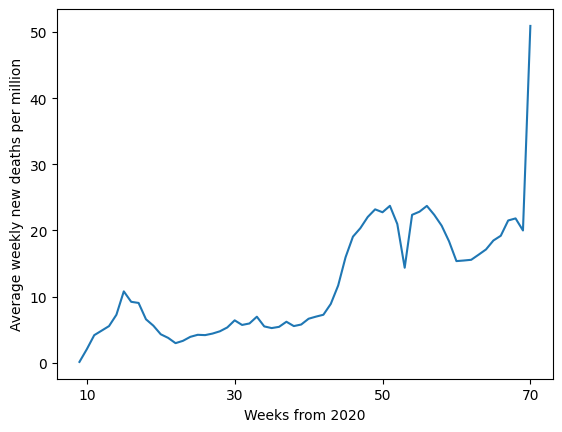

In [16]:
# This dataset shows how much more apparent it was that COVID can be deadly as time passed
# The mass increase in early 2021 coincides with US reports at the time of its deadliest week suggesting a global occurence
# This plot is hard to judge because there's also the fact that it's hard to attribute deaths strictly to COVID and data entry is still suspect
plt.plot(date_list, ta_dataset['weekly_new_deaths_per_million'])
plt.xticks([10, 30, 50, 70])
plt.xlabel('Weeks from 2020')
plt.ylabel('Average weekly new deaths per million')
plt.show()

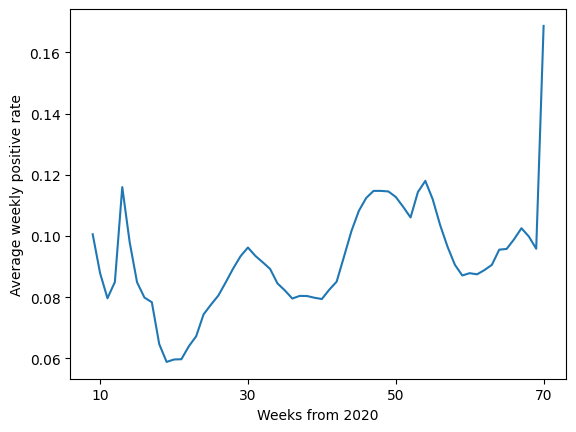

In [17]:
# There aren't many easily discernable trends or cycles in this dataset but it is interesting to see that it's peak coincided with the 
# peak new weekly deaths per million. It models the new deaths per million to an extent generally as well.
plt.plot(date_list, ta_dataset['weekly_avg_positive_rate'])
plt.xticks([10, 30, 50, 70])
plt.xlabel('Weeks from 2020')
plt.ylabel('Average weekly positive rate')
plt.show()

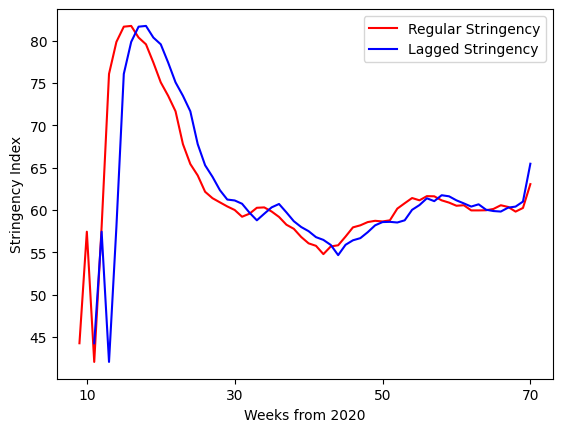

In [18]:
# From this picture a couple of things are evident.
# For starterrs teh lagged stringency does model the regular stringency rpetty well as it should
# Second, it's evident that there was a global immediate reaction (peak stringency) that leveled off and then likely picked back up
# due to the 2021 peak deaths and positive rate
plt.plot(date_list, ta_dataset['weekly_avg_stringency_index'], color = 'red', label = 'Regular Stringency')
plt.plot(date_list, ta_dataset['lagged_stringency_2weeks'], color = 'blue', label = 'Lagged Stringency')
plt.legend()
plt.xticks([10, 30, 50, 70])
plt.xlabel('Weeks from 2020')
plt.ylabel('Stringency Index')
plt.show()

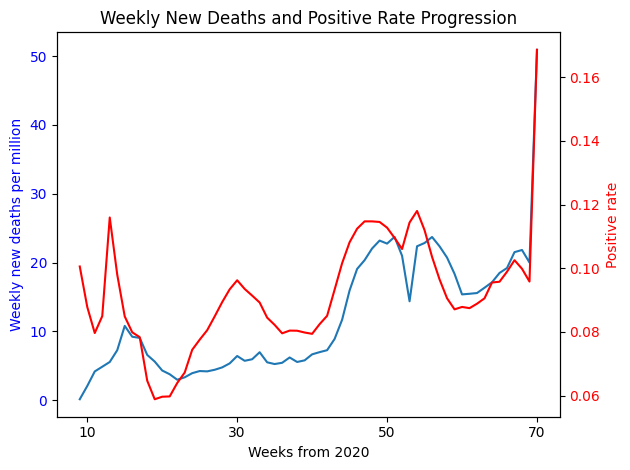

In [19]:
# Now that we've graphed indiviudal variables, we'll graph some of the variables together to see if there are any trends or cycles to look for
# Create the first plot (left y-axis)
fig, ax1 = plt.subplots()
ax1.plot(date_list, ta_dataset['weekly_new_deaths_per_million'])
ax1.set_xlabel('Weeks from 2020')
ax1.set_ylabel('Weekly new deaths per million', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second plot (right y-axis)
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
ax2.plot(date_list, ta_dataset['weekly_avg_positive_rate'], color = 'red')
ax2.set_ylabel('Positive rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Weekly New Deaths and Positive Rate Progression')
plt.xticks([10, 30, 50, 70])
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
# These results are pretty interesting. They show that there is a relationship between the new deaths and positive rate which is to expected.
# It's almost as if a transformation has been applied to one of the lines.
# Instead of catching infections early (which would make positive rate spike before deaths), 
# the testing is simply confirming the outbreak that's already severe enough to cause deaths.

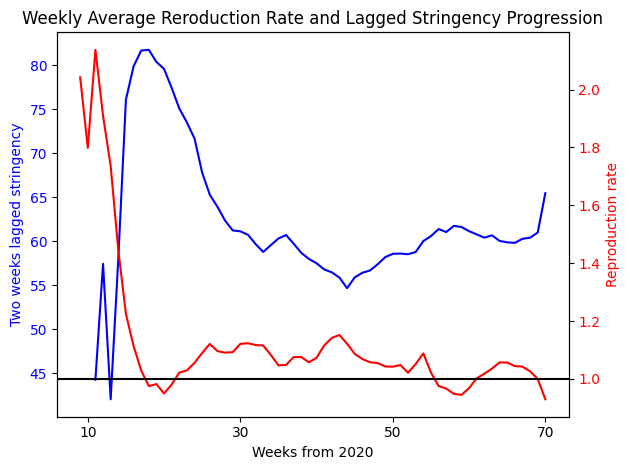

In [20]:
# Now we model the stringency index and the reproduction rate
fig, ax1 = plt.subplots()
ax1.plot(date_list, ta_dataset['lagged_stringency_2weeks'], color = 'blue')
ax1.set_xlabel('Weeks from 2020')
ax1.set_ylabel('Two weeks lagged stringency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second plot (right y-axis)
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
ax2.plot(date_list, ta_dataset['weekly_average_rr'], color = 'red')
ax2.set_ylabel('Reproduction rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Weekly Average Reroduction Rate and Lagged Stringency Progression')
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.xticks([10, 30, 50, 70])
plt.axhline(y=1, color = 'black')
plt.show()
# These results are pretty interesting as well. Both graphs have an inverse relationship with each other. They both have an early spike/drop 
# then a subsequent mass peak/drop before sort of leveling out. This suggests that early, strict and decisive actions were the most effective.

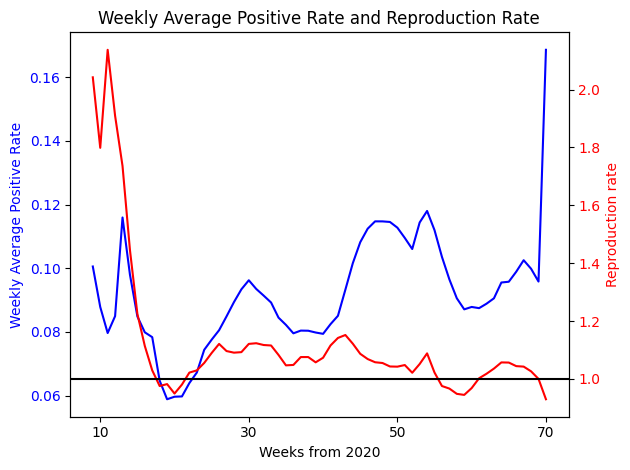

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(date_list, ta_dataset['weekly_avg_positive_rate'], color = 'blue')
ax1.set_xlabel('Weeks from 2020')
ax1.set_ylabel('Weekly Average Positive Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second plot (right y-axis)
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
ax2.plot(date_list, ta_dataset['weekly_average_rr'], color = 'red')
ax2.set_ylabel('Reproduction rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Weekly Average Positive Rate and Reproduction Rate');
fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.xticks([10, 30, 50, 70]);
plt.axhline(y=1, color = 'black');
# The data reveals a three-phase pandemic response:
# initial effective surveillance (high transmission but low positive rate through extensive testing)
# followed by successful coordinated control (both metrics declining together), and finally a sustained 30-week period of stable management before
# there was likely either a policy shift, an incident, or just degradation due to other facts resulting in the mass positive rate increase.

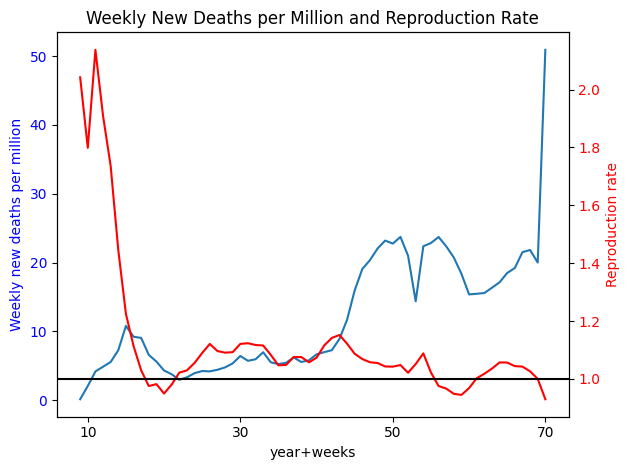

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(date_list, ta_dataset['weekly_new_deaths_per_million'])
ax1.set_xlabel('year+weeks')
ax1.set_ylabel('Weekly new deaths per million', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second plot (right y-axis)
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
ax2.plot(date_list, ta_dataset['weekly_average_rr'], color = 'red')
ax2.set_ylabel('Reproduction rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Weekly New Deaths per Million and Reproduction Rate')
plt.axhline(y=1, color = 'black')
plt.xticks([10, 30, 50, 70]);

fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# These results suggest that the reproduction rate, while extremely problematic at first, soon become managed and shrunk drastically
# Concurrently, the weekly deaths would increase faster but level off modeling the rr at first before just shooting up. There was still
# a period of stable increase before a mass increase. While COVID itself became better managed, it's likely the true results of it's deaths were revealed. 

In [23]:
# All the dual-axis graphs demonstrated initial problems that were soon managed. 2020 30 weeks in to 2021 was a period of stability
# while there was an incident or just a degradation that led to another problem in early 2021
# Now that I've visualized trends, I will quantify the effectiveness of the stringent policies, first at a general level, then at a granular level

In [24]:
# Here is a multi-variable phase analysis showing the relationship between various variables across different time periods
# Here we can see the powerful inverse relatioship between reproduction rate and stringency, particularly in the beginning and end
# We can also see that more strignency led to more deaths (ostensibly), especially at the end but this can just be due to other factors
# such as trying to attribute deaths to COVID or COVID being a factor that contributed
phase_analysis = {}
for i, phase_name in enumerate(['Phase 1 (Early)', 'Phase 2 (Stable)', 'Phase 3 (Late)']):
    if i == 0: phase_data = ta_dataset.iloc[:20]
    elif i == 1: phase_data = ta_dataset.iloc[20:50]
    else: phase_data = ta_dataset.iloc[50:]
    
    phase_analysis[phase_name] = {
        'RR-Stringency': phase_data['weekly_average_rr'].corr(phase_data['lagged_stringency_2weeks']),
        'Deaths-Stringency': phase_data['weekly_new_deaths_per_million'].corr(phase_data['lagged_stringency_2weeks']),
        'Deaths-RR': phase_data['weekly_new_deaths_per_million'].corr(phase_data['weekly_average_rr']),
        'PositiveRate-Stringency': phase_data['weekly_avg_positive_rate'].corr(phase_data['lagged_stringency_2weeks'])
    }

# B. Policy effectiveness metrics
for phase_name, correlations in phase_analysis.items():
    print(f"\n{phase_name} Policy Effectiveness:")
    for relationship, corr in correlations.items():
        print(f"  {relationship}: {corr:.3f}")


Phase 1 (Early) Policy Effectiveness:
  RR-Stringency: -0.847
  Deaths-Stringency: 0.254
  Deaths-RR: -0.310
  PositiveRate-Stringency: -0.749

Phase 2 (Stable) Policy Effectiveness:
  RR-Stringency: -0.475
  Deaths-Stringency: 0.004
  Deaths-RR: -0.633
  PositiveRate-Stringency: -0.157

Phase 3 (Late) Policy Effectiveness:
  RR-Stringency: -0.821
  Deaths-Stringency: 0.893
  Deaths-RR: -0.531
  PositiveRate-Stringency: 0.855


In [25]:
# Phase-based socioeconomic analysis
socio_phase_analysis = {}
for phase_name, phase_data in [('Early', ta_dataset.iloc[:20]), 
                               ('Stable', ta_dataset.iloc[20:50]), 
                               ('Late', ta_dataset.iloc[50:])]:
    socio_phase_analysis[phase_name] = {
        'Wealthy_countries_stringency': phase_data[phase_data['gdp_per_capita'] > phase_data['gdp_per_capita'].median()]['weekly_avg_stringency_index'].mean(),
        'Poor_countries_stringency': phase_data[phase_data['gdp_per_capita'] <= phase_data['gdp_per_capita'].median()]['weekly_avg_stringency_index'].mean()
    }

for phase, data in socio_phase_analysis.items():
    print(f'{phase}:\n')
    for wealth, stringency in data.items():
        print(f'   {wealth}: {float(stringency)}\n')
# The data suggest that for the most part, there wasn't an inherent difference between how wealthier/poorer countries combatted COVID

Early:

   Wealthy_countries_stringency: 68.1038297874293

   Poor_countries_stringency: 67.93871479748833

Stable:

   Wealthy_countries_stringency: 58.63895024846904

   Poor_countries_stringency: 59.04617508684031

Late:

   Wealthy_countries_stringency: 60.1296776874116

   Poor_countries_stringency: 60.67582529172327



In [26]:
# Find stringency thresholds for effectiveness
high_stringency = ta_dataset[ta_dataset['lagged_stringency_2weeks'] > 65]
medium_stringency = ta_dataset[(ta_dataset['lagged_stringency_2weeks'] >= 50) & 
                               (ta_dataset['lagged_stringency_2weeks'] <= 65)]
low_stringency = ta_dataset[ta_dataset['lagged_stringency_2weeks'] < 50]

threshold_analysis = {
    'High_Stringency_Avg_RR': float(high_stringency['weekly_average_rr'].mean()),
    'Medium_Stringency_Avg_RR': float(medium_stringency['weekly_average_rr'].mean()),
    'Low_Stringency_Avg_RR': float(low_stringency['weekly_average_rr'].mean())
}
for stringency, avg_rr in threshold_analysis.items():
    print(f'{stringency}: {avg_rr}\n')
# From here, it's evident that a low stringency index is detrimental and has almost double the reproduction rate. 
# A high strignency index is the best option but a medium stringency may be more sustainable for families, businesses, etc

High_Stringency_Avg_RR: 1.0388872536947689

Medium_Stringency_Avg_RR: 1.0840351856767605

Low_Stringency_Avg_RR: 1.9365315934065934



In [27]:
# Now we're going for our final analysis. We will be carefully analyzing the United States and similar countries
# First we have to get a list of the 10 most similar countries to the United States via the control variables

# first we'll get a list of the individual normalized control variable values for each country
country_list = {}
country_set = set()
scaler = MinMaxScaler()


copy_dataset = dataset.copy()
copy_dataset = copy_dataset.groupby('location').mean()

scaled_data = scaler.fit_transform(copy_dataset)

# Convert back to DataFrame with original index and column names
copy_dataset = pd.DataFrame(scaled_data, 
                           index=copy_dataset.index, 
                           columns=copy_dataset.columns)

for country in dataset['location']:
    if country in country_set:
        continue
    country_set.add(country)
    country_list[country] = []

    country_list[country].append(float(copy_dataset[copy_dataset.index == country]['population'].mean()))
    country_list[country].append(float(copy_dataset[copy_dataset.index == country]['gdp_per_capita'].mean()))
    country_list[country].append(float(copy_dataset[copy_dataset.index == country]['median_age'].mean()))
    country_list[country].append(float(copy_dataset[copy_dataset.index == country]['population_density'].mean()))

similarity_score = []
for country in country_set:
    if country == 'United States' or pd.isna(country_list[country]).any():
        continue
    distance = euclidean(country_list['United States'], country_list[country])
    similarity_score.append((distance,country))

similarity_score = sorted(similarity_score)
most_similar_countries = set()
for score, country in similarity_score:
    print(f'{country}: {score}\n')
    most_similar_countries.add(country)
    if len(most_similar_countries) == 10:
        break
most_similar_countries.add('United States')

Australia: 0.2366212732918966

United Kingdom: 0.24283181186061248

Canada: 0.2498202149461418

Iceland: 0.25073795115754177

Sweden: 0.25537555691848135

Norway: 0.25672068321286784

France: 0.2608346772196739

Ireland: 0.26221203161726464

Denmark: 0.2752183633275542

Belgium: 0.27831482332552254



In [28]:
# Here is the final dataset of the United States and the 10 most similar countries
similar_df = dataset[dataset['location'].isin(most_similar_countries)]
#similar_df
similar_df

,location,population,year_week,weekly_new_deaths_per_million,weekly_average_rr,weekly_avg_stringency_index,lagged_stringency_2weeks,weekly_avg_positive_rate,population_density,median_age,gdp_per_capita
5,United States,331002647,202011,0.147,3.384286,28.504286,NaN,0.072286,35.608,38.3,54225.446
6,Belgium,11589616,202011,0.345,2.658571,28.174286,NaN,0.082714,375.564,41.8,42658.576
9,Canada,37742157,202011,0.026,2.817500,16.004286,NaN,0.015429,4.037,41.4,44017.591
13,Canada,37742157,202012,0.555,2.771429,60.451429,NaN,0.020143,4.037,41.4,44017.591
14,Belgium,11589616,202012,6.126,2.425714,70.371429,NaN,0.161714,375.564,41.8,42658.576
...,...,...,...,...,...,...,...,...,...,...,...
5436,Norway,5421242,202116,5.163,0.834286,67.130000,69.91,0.028429,14.462,39.7,64800.057
5439,Iceland,341250,202116,0.000,1.131429,48.808571,57.41,0.006714,3.404,37.3,46482.958
5445,Ireland,4937796,202116,7.495,1.027143,80.560000,84.26,0.025714,69.874,38.7,67335.293
5456,Belgium,11589616,202116,23.901,0.955714,60.190000,75.93,0.093286,375.564,41.8,42658.576


In [29]:
# First we're going to look at a correlation matrix
cols = ['weekly_new_deaths_per_million', 'weekly_average_rr',	'weekly_avg_stringency_index',	'lagged_stringency_2weeks',
'weekly_avg_positive_rate',	'population_density', 'median_age', 'gdp_per_capita']
similar_cm = similar_df[cols].corr()
print(similar_cm)
# From this correlation matrix we can see that positive rate has a strong positve correlation with new deaths, which logically makes sense
# We can also see that stringency has a medium positive correlation with new deaths and a medium negative correlation with reproduction rate
# The control variables play a very small role here

                               weekly_new_deaths_per_million  \
weekly_new_deaths_per_million                       1.000000   
weekly_average_rr                                  -0.155661   
weekly_avg_stringency_index                         0.480068   
lagged_stringency_2weeks                            0.402488   
weekly_avg_positive_rate                            0.706968   
population_density                                  0.364919   
median_age                                          0.190649   
gdp_per_capita                                     -0.127385   

                               weekly_average_rr  weekly_avg_stringency_index  \
weekly_new_deaths_per_million          -0.155661                     0.480068   
weekly_average_rr                       1.000000                    -0.266104   
weekly_avg_stringency_index            -0.266104                     1.000000   
lagged_stringency_2weeks               -0.415734                     0.841294   
weekly_avg_positiv

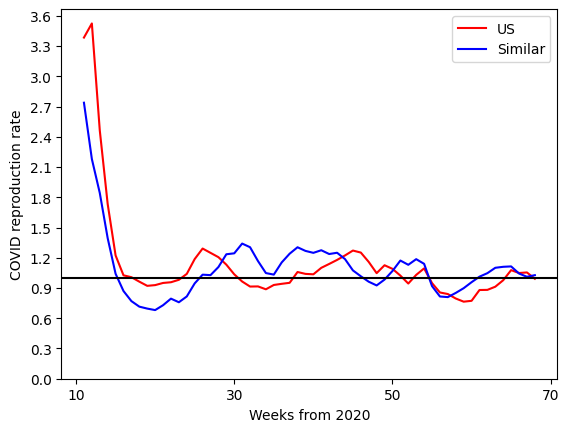

In [30]:
# Now we're going to do a time series comparison of US vs it's most similar countries; the first metric will be reproduction rate

# First we're just preparing copy datasets
US_df = similar_df[similar_df['location'] == 'United States']

similar_df_copy = similar_df[similar_df['location'] != 'United States']
similar_df_copy = similar_df_copy.drop(columns = ['location'])
                                  
US_date_set = set(US_df['year_week'])
similar_date_set = set(similar_df_copy['year_week'])

US_date_set = US_date_set.intersection(similar_date_set)

final_date = []

for value in US_date_set:
    date = 0
    if value // 100 == 2021:
        date += 53
    date += value % 100
    final_date.append(date)
final_date = sorted(final_date)

US_df = US_df[US_df['year_week'].isin(US_date_set)]
similar_df_copy = similar_df_copy[similar_df_copy['year_week'].isin(US_date_set)]
similar_df_copy = similar_df_copy.groupby('year_week').mean()


plt.plot(final_date, US_df['weekly_average_rr'], label = 'US', color = 'red')
plt.plot(final_date, similar_df_copy['weekly_average_rr'], label = 'Similar', color = 'blue')
plt.xticks([10, 30, 50, 70])
plt.yticks(np.arange(0, 3.71, 0.3))
plt.axhline(y=1, color = 'black')
plt.xlabel('Weeks from 2020')
plt.ylabel('COVID reproduction rate')
plt.legend()
plt.show()
# Here we can see that the US and the similar countries do infact look quite similar
# While teh US had a harsh outbreak, they were able to respond and soon modeled the similar countries

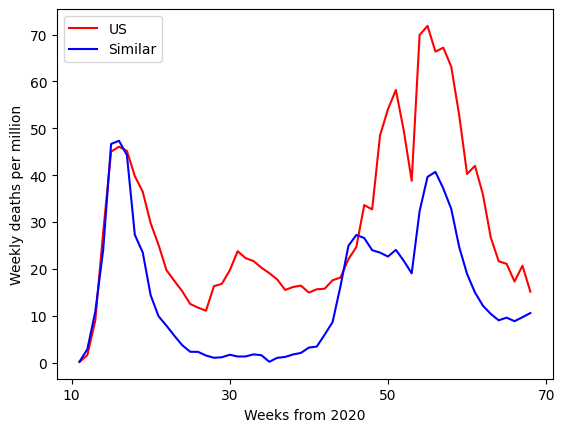

In [31]:
# Now we will look at weekly deaths
plt.plot(final_date, US_df['weekly_new_deaths_per_million'], label = 'US', color = 'red')
plt.plot(final_date, similar_df_copy['weekly_new_deaths_per_million'], label = 'Similar', color = 'blue')
plt.xticks([10, 30, 50, 70])
plt.xlabel('Weeks from 2020')
plt.ylabel('Weekly deaths per million')
plt.legend()
plt.show()
# While the US and the similar countries had pretty much the same first ~20 weeks, the US suffered more deaths, particularly from week 45+

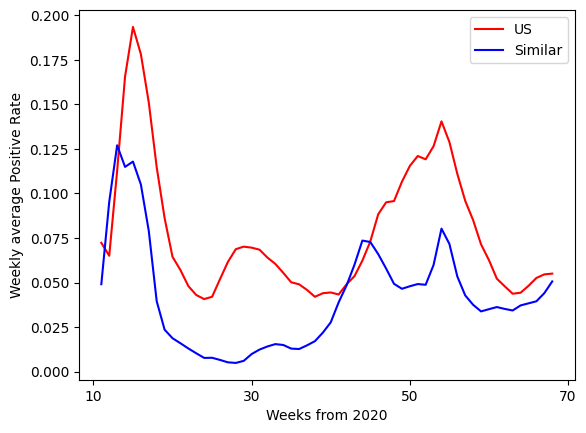

In [32]:
plt.plot(final_date, US_df['weekly_avg_positive_rate'], label = 'US', color = 'red')
plt.plot(final_date, similar_df_copy['weekly_avg_positive_rate'], label = 'Similar', color = 'blue')
plt.xticks([10, 30, 50, 70])
plt.xlabel('Weeks from 2020')
plt.ylabel('Weekly average Positive Rate')
plt.legend()
plt.show()
# Even in this model it looks like the US and the similar countries had a similar trend
# but the similar countries were able to manage their rates better

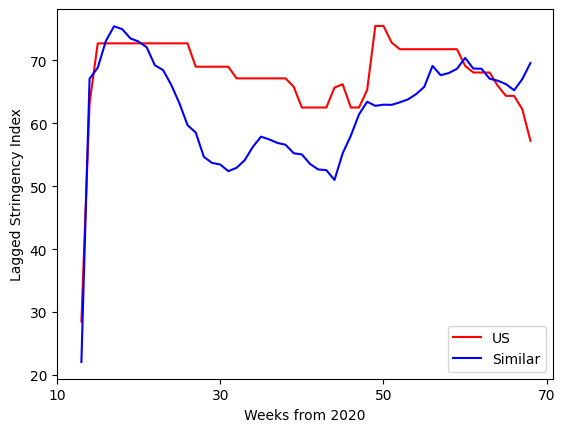

In [33]:
plt.plot(final_date, US_df['lagged_stringency_2weeks'], label = 'US', color = 'red')
plt.plot(final_date, similar_df_copy['lagged_stringency_2weeks'], label = 'Similar', color = 'blue')
plt.xticks([10, 30, 50, 70])
plt.xlabel('Weeks from 2020')
plt.ylabel('Lagged Stringency Index')
plt.legend()
plt.show()
# Here it looks like while the US and similar countries both started off stringent, the US continued to be stricter

In [58]:
# Now as the final analysis, I'll be looking for the country that performed the best in combatting COVID across different metrics 
# and comparing them to the United States to see if there are any recommended actions to take

scaler = MinMaxScaler()



US_phase_analysis = {}

for phase_name, phase_data in [('Early', similar_df[(similar_df['year_week'] >= 202009) & (similar_df['year_week'] < 202022)]),
                               ('Stable', similar_df[(similar_df['year_week'] >= 202022) & (similar_df['year_week'] < 202047)]),
                               ('Late', similar_df[(similar_df['year_week'] >= 202047)])]:
    
    phase_data = phase_data.groupby('location').mean()

    scaled_data = scaler.fit_transform(phase_data)
    
    phase_data = pd.DataFrame(scaled_data, index = phase_data.index, columns = phase_data.columns)

    US_score = phase_data.loc['United States']['weekly_average_rr'] + phase_data.loc['United States']['weekly_new_deaths_per_million'] + phase_data.loc['United States']['weekly_avg_positive_rate']

    global_list = []
    
    for country in most_similar_countries:
        
        try:
            global_score = phase_data.loc[country]['weekly_average_rr'] + phase_data.loc[country]['weekly_new_deaths_per_million'] + phase_data.loc[country]['weekly_avg_positive_rate']
            global_list.append((global_score, country))
        except:
            continue



    global_list = sorted(global_list)
    print(f'{phase_name}\n')
    for value, country in global_list:
        print(f'    {country}: {value}\n')
            
    US_phase_analysis[phase_name] = {
        'Best': (global_list[0][1], global_list[0][0]),
        'US': US_score
}
    

Early

    Australia: 0.08720321931589536

    Iceland: 0.15661174986089355

    Norway: 0.3073501243728517

    France: 0.44322736399765605

    Denmark: 0.8432564939003755

    Canada: 1.5692717263896663

    Ireland: 1.6599346307061227

    United States: 2.207717028491882

    United Kingdom: 2.2140005539565246

    Belgium: 2.694453170404928

Stable

    Australia: 0.04783066875580638

    Iceland: 0.5248376986935215

    Norway: 0.5570997312870408

    Denmark: 0.5652153774952173

    Canada: 0.5720702979370689

    Ireland: 0.6355632695401099

    United Kingdom: 1.1101647743178835

    Sweden: 1.6770947894584882

    France: 1.917993406565629

    United States: 1.9889613428150472

    Belgium: 2.4414826908970446

Late

    Iceland: 0.15478052159018518

    Australia: 0.48772745309222776

    Norway: 0.6391181091910981

    Denmark: 0.688469772858044

    Canada: 1.1234837150064756

    United Kingdom: 1.3155136010998723

    Ireland: 1.340930361223226

    Belgium: 1.603051808

In [65]:
for phase, data in US_phase_analysis.items():
    print(f'{phase}:\n')
    print(f'    {US_phase_analysis[phase]['Best'][0]}: {US_phase_analysis[phase]['Best'][1]}\n')
    print(f'    United States: {US_phase_analysis[phase]['US']}\n')
# Based on the results there are a couple of key concepts to note:
# The US did very poorly (arguably the worst) compared to the countries identified as its most similar
# Australia did the best comparatively

Early:

    Australia: 0.08720321931589536

    United States: 2.207717028491882

Stable:

    Australia: 0.04783066875580638

    United States: 1.9889613428150472

Late:

    Iceland: 0.15478052159018518

    United States: 1.7849350065666356



In [88]:
# For the last bit of analysis, we'll visually compare how the US and Australia handled COVID respectively

# First we have to get valid dates for both
US_date = set(similar_df[similar_df['location'] == 'United States']['year_week'])
Australia_date = set(similar_df[similar_df['location'] == 'Australia']['year_week'])

US_ds = []
Aus_ds = [] 

for value in US_date:
    date = 0
    if value // 100 == 2021:
        date += 53
    date += value % 100
    US_ds.append(date)
US_ds = sorted(US_ds)


for val in Australia_date: 
    date = 0
    if val // 100 == 2021:
        date += 53
    date += val % 100
    Aus_ds.append(date)
Aus_ds = sorted(Aus_ds) 


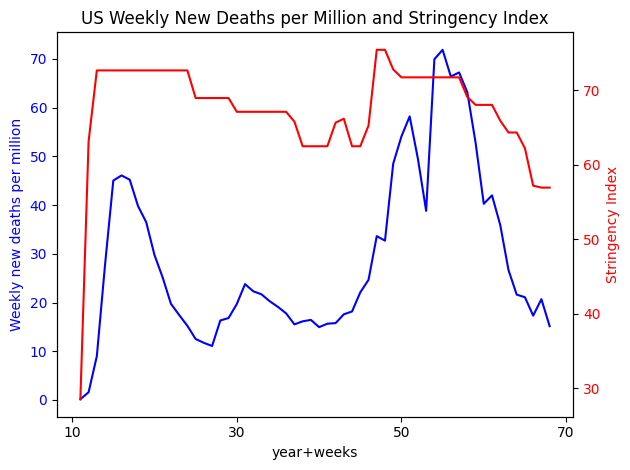

In [99]:
# Now we'll plot the US relationship between death and the lagged stringency
fig, ax1 = plt.subplots()
ax1.plot(US_ds, similar_df[similar_df['location'] == 'United States']['weekly_new_deaths_per_million'], color = 'blue')
ax1.set_xlabel('year+weeks')
ax1.set_ylabel('Weekly new deaths per million', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second plot (right y-axis)
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis
ax2.plot(US_ds, similar_df[similar_df['location'] == 'United States']['weekly_avg_stringency_index'], color = 'red')
ax2.set_ylabel('Stringency Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('US Weekly New Deaths per Million and Stringency Index')
plt.xticks([10, 30, 50, 70]);

fig.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

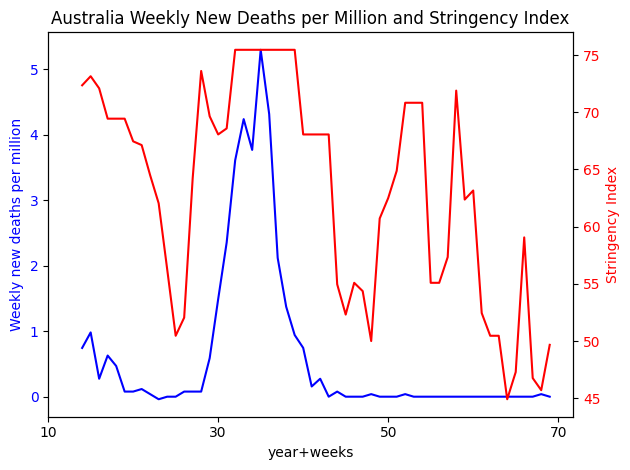

In [95]:
fig1, ax2 = plt.subplots()

ax2.plot(Aus_ds, similar_df[similar_df['location'] == 'Australia']['weekly_new_deaths_per_million'], color = 'blue')
ax2.set_xlabel('year+weeks')
ax2.set_ylabel('Weekly new deaths per million', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Create the second plot (right y-axis)
ax3 = ax2.twinx()  # Create a twin Axes sharing the x-axis
ax3.plot(Aus_ds, similar_df[similar_df['location'] == 'Australia']['weekly_avg_stringency_index'], color = 'red')
ax3.set_ylabel('Stringency Index', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Add title and legend
plt.title('Australia Weekly New Deaths per Million and Stringency Index')
plt.xticks([10, 30, 50, 70]);

fig1.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [101]:
# Before comparing the results of the two countries, it is important to note that US is significantly more populated then Australia which can affect their reactions
# With the US there is an initial surge, before it levels out, continues to gradually increase, before falling completely
# With Australia, they did a better job of handling the inital phase, but suffered their worst phase ever a couple of weeks prior to implementing their lowest stringency
# While this may be attributed to the delta variant which hit Australia hard. Ultimately they were able to recover and managed the rest of the time.
# The key point is that Australia was more reactive in its initial phase and throughout their tenue. They were able to mitigate the initial phase and only suffered one peak
# In contrast the US had growing cases of COVID which may be attributed to them remaining relatively stagnant with their stringency